In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import io
import base64

/var/folders/fb/xl0hnskx527bfqkv38l3sn7h0000gn/T/ipykernel_10087/3519854905.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
with open("_data/202402/CEN08B3_mesicni_data.txt", encoding = "utf-16") as f:
    line = f.readline()
    row = 0
    data = []
    row_indexes = []
    while line != "":
        if row == 0:
            # prvni zaznam je 'Oddíl ECOICOP', coz je nas index
            columns = line.replace("\n", "").replace('"', "").split("\t")[1:]
        else:
            processed_line = line.replace("\n", "").replace(",", ".").split("\t")
            row_indexes.append(processed_line[0])
            data.append(processed_line[1:])
        line = f.readline()
        row += 1

print(columns)
print(data)

['Úhrn', 'Potraviny a nealkoholické nápoje', 'Alkoholické nápoje, tabák', 'Odívání a obuv', 'Bydlení, voda, energie, paliva', 'Bytové vybavení, zařízení domácnosti; opravy', 'Zdraví', 'Doprava', 'Pošty a telekomunikace', 'Rekreace a kultura', 'Vzdělávání', 'Stravování a ubytování', 'Ostatní zboží a služby']
[['102.2', '104.5', '103.2', '99.5', '102.3', '100.6', '104.0', '101.0', '98.8', '100.4', '101.5', '103.8', '100.8'], ['101.8', '102.3', '102.3', '99.9', '102.3', '101.3', '103.8', '101.1', '97.7', '100.4', '101.5', '103.4', '101.4'], ['101.7', '101.9', '102.0', '99.8', '102.3', '101.0', '103.8', '101.1', '97.6', '100.7', '101.5', '103.4', '102.1'], ['101.9', '101.8', '103.8', '99.2', '102.5', '101.1', '103.8', '101.5', '97.8', '100.8', '101.5', '103.5', '101.9'], ['102.2', '102.4', '103.6', '98.6', '102.5', '101.5', '103.9', '102.9', '97.8', '100.5', '101.5', '103.6', '102.5'], ['102.6', '102.7', '103.5', '99.1', '102.8', '101.3', '103.7', '104.6', '98.2', '100.5', '101.6', '103.6'

In [5]:
for i in range(len(data)):
    assert len(columns) == len(data[i]), "Pozor, nesedi pocet sloupcu"

In [6]:
df = pd.DataFrame(data, index = row_indexes)
df.columns = columns

In [7]:
df

,Úhrn,Potraviny a nealkoholické nápoje,"Alkoholické nápoje, tabák",Odívání a obuv,"Bydlení, voda, energie, paliva","Bytové vybavení, zařízení domácnosti; opravy",Zdraví,Doprava,Pošty a telekomunikace,Rekreace a kultura,Vzdělávání,Stravování a ubytování,Ostatní zboží a služby
01/2018,102.2,104.5,103.2,99.5,102.3,100.6,104.0,101.0,98.8,100.4,101.5,103.8,100.8
02/2018,101.8,102.3,102.3,99.9,102.3,101.3,103.8,101.1,97.7,100.4,101.5,103.4,101.4
03/2018,101.7,101.9,102.0,99.8,102.3,101.0,103.8,101.1,97.6,100.7,101.5,103.4,102.1
04/2018,101.9,101.8,103.8,99.2,102.5,101.1,103.8,101.5,97.8,100.8,101.5,103.5,101.9
05/2018,102.2,102.4,103.6,98.6,102.5,101.5,103.9,102.9,97.8,100.5,101.5,103.6,102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/2023,108.5,103.7,106.1,107.9,119.6,103.3,109.2,97.8,103.3,107.7,106.5,109.2,105.4
11/2023,107.3,101.5,105.9,107.4,117.0,102.6,106.2,97.7,103.2,106.9,106.4,108.8,106.0
12/2023,106.9,99.7,105.7,106.1,116.8,102.3,106.6,99.8,103.6,106.0,106.4,108.5,104.9
01/2024,102.3,96.1,105.8,105.9,103.1,101.4,105.4,100.4,103.4,104.8,106.8,108.9,103.5


In [8]:
df1 = df.astype(float)
df1

,Úhrn,Potraviny a nealkoholické nápoje,"Alkoholické nápoje, tabák",Odívání a obuv,"Bydlení, voda, energie, paliva","Bytové vybavení, zařízení domácnosti; opravy",Zdraví,Doprava,Pošty a telekomunikace,Rekreace a kultura,Vzdělávání,Stravování a ubytování,Ostatní zboží a služby
01/2018,102.2,104.5,103.2,99.5,102.3,100.6,104.0,101.0,98.8,100.4,101.5,103.8,100.8
02/2018,101.8,102.3,102.3,99.9,102.3,101.3,103.8,101.1,97.7,100.4,101.5,103.4,101.4
03/2018,101.7,101.9,102.0,99.8,102.3,101.0,103.8,101.1,97.6,100.7,101.5,103.4,102.1
04/2018,101.9,101.8,103.8,99.2,102.5,101.1,103.8,101.5,97.8,100.8,101.5,103.5,101.9
05/2018,102.2,102.4,103.6,98.6,102.5,101.5,103.9,102.9,97.8,100.5,101.5,103.6,102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/2023,108.5,103.7,106.1,107.9,119.6,103.3,109.2,97.8,103.3,107.7,106.5,109.2,105.4
11/2023,107.3,101.5,105.9,107.4,117.0,102.6,106.2,97.7,103.2,106.9,106.4,108.8,106.0
12/2023,106.9,99.7,105.7,106.1,116.8,102.3,106.6,99.8,103.6,106.0,106.4,108.5,104.9
01/2024,102.3,96.1,105.8,105.9,103.1,101.4,105.4,100.4,103.4,104.8,106.8,108.9,103.5


In [9]:
df1['Úhrn'].values

array([102.2, 101.8, 101.7, 101.9, 102.2, 102.6, 102.3, 102.5, 102.3,
       102.2, 102. , 102. , 102.5, 102.7, 103. , 102.8, 102.9, 102.7,
       102.9, 102.9, 102.7, 102.7, 103.1, 103.2, 103.6, 103.7, 103.4,
       103.2, 102.9, 103.3, 103.4, 103.3, 103.2, 102.9, 102.7, 102.3,
       102.2, 102.1, 102.3, 103.1, 102.9, 102.8, 103.4, 104.1, 104.9,
       105.8, 106. , 106.6, 109.9, 111.1, 112.7, 114.2, 116. , 117.2,
       117.5, 117.2, 118. , 115.1, 116.2, 115.8, 117.5, 116.7, 115. ,
       112.7, 111.1, 109.7, 108.8, 108.5, 106.9, 108.5, 107.3, 106.9,
       102.3, 102. ])

In [11]:
display.display(display.Markdown("""# Tento ${\color{red}index}$ je ${\color{red}na}$ ${\color{red}prd}$."""))
df1[df1.index > '12/2022']

# Tento ${\color{red}index}$ je ${\color{red}na}$ ${\color{red}prd}$.

,Úhrn,Potraviny a nealkoholické nápoje,"Alkoholické nápoje, tabák",Odívání a obuv,"Bydlení, voda, energie, paliva","Bytové vybavení, zařízení domácnosti; opravy",Zdraví,Doprava,Pošty a telekomunikace,Rekreace a kultura,Vzdělávání,Stravování a ubytování,Ostatní zboží a služby
12/2023,106.9,99.7,105.7,106.1,116.8,102.3,106.6,99.8,103.6,106.0,106.4,108.5,104.9


In [12]:
index_new = []
for index in df1.index:
    #print(index)
    index1 = index.split("/")
    assert len(index1) == 2
    index_new.append(index1[1] + "-" + index1[0])

In [13]:
index_new[:10]

['2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10']

In [14]:
df1.index = index_new

In [15]:
df1

,Úhrn,Potraviny a nealkoholické nápoje,"Alkoholické nápoje, tabák",Odívání a obuv,"Bydlení, voda, energie, paliva","Bytové vybavení, zařízení domácnosti; opravy",Zdraví,Doprava,Pošty a telekomunikace,Rekreace a kultura,Vzdělávání,Stravování a ubytování,Ostatní zboží a služby
2018-01,102.2,104.5,103.2,99.5,102.3,100.6,104.0,101.0,98.8,100.4,101.5,103.8,100.8
2018-02,101.8,102.3,102.3,99.9,102.3,101.3,103.8,101.1,97.7,100.4,101.5,103.4,101.4
2018-03,101.7,101.9,102.0,99.8,102.3,101.0,103.8,101.1,97.6,100.7,101.5,103.4,102.1
2018-04,101.9,101.8,103.8,99.2,102.5,101.1,103.8,101.5,97.8,100.8,101.5,103.5,101.9
2018-05,102.2,102.4,103.6,98.6,102.5,101.5,103.9,102.9,97.8,100.5,101.5,103.6,102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10,108.5,103.7,106.1,107.9,119.6,103.3,109.2,97.8,103.3,107.7,106.5,109.2,105.4
2023-11,107.3,101.5,105.9,107.4,117.0,102.6,106.2,97.7,103.2,106.9,106.4,108.8,106.0
2023-12,106.9,99.7,105.7,106.1,116.8,102.3,106.6,99.8,103.6,106.0,106.4,108.5,104.9
2024-01,102.3,96.1,105.8,105.9,103.1,101.4,105.4,100.4,103.4,104.8,106.8,108.9,103.5


In [16]:
display.display(display.Markdown("""# Tento ${\color{green}index}$ je ${\color{green}mnohem}$ ${\color{green}lepší}$."""))
df1[df1.index >= '2022-12']

# Tento ${\color{green}index}$ je ${\color{green}mnohem}$ ${\color{green}lepší}$.

,Úhrn,Potraviny a nealkoholické nápoje,"Alkoholické nápoje, tabák",Odívání a obuv,"Bydlení, voda, energie, paliva","Bytové vybavení, zařízení domácnosti; opravy",Zdraví,Doprava,Pošty a telekomunikace,Rekreace a kultura,Vzdělávání,Stravování a ubytování,Ostatní zboží a služby
2022-12,115.8,125.5,105.8,117.9,117.0,112.6,109.9,109.2,102.2,113.4,107.5,125.5,112.5
2023-01,117.5,124.8,106.8,116.3,124.3,112.6,109.7,107.6,102.2,113.5,107.2,123.3,113.5
2023-02,116.7,123.9,107.3,115.3,122.2,113.2,109.5,106.9,102.4,114.1,107.4,122.6,113.6
2023-03,115.0,123.5,106.4,114.3,120.1,111.9,109.4,99.4,102.9,114.4,107.2,121.2,113.4
2023-04,112.7,117.3,106.7,113.1,117.6,112.0,109.9,98.3,103.8,112.9,107.2,117.5,112.3
2023-05,111.1,114.5,106.5,112.1,116.1,110.4,109.6,95.6,103.9,111.7,107.2,115.0,110.8
2023-06,109.7,112.0,106.5,111.2,114.4,108.7,109.0,94.2,103.9,110.6,107.2,113.8,110.4
2023-07,108.8,109.5,107.2,111.1,113.2,106.5,109.0,94.3,105.0,110.4,107.2,112.8,108.8
2023-08,108.5,107.9,107.3,110.9,112.7,105.5,109.0,98.3,104.7,109.8,107.2,111.8,108.3
2023-09,106.9,106.0,106.9,109.2,108.9,103.7,108.8,100.2,104.3,108.7,106.5,110.3,106.9


# Teď zkusím spočítat hodnoty z webu

**Průměrná roční míra inflace –** jedná se o hodnotu téhož ukazatele v prosinci daného roku.
>rok 2023: **10,7 %**

In [17]:
with open("_data/202402/CEN08B3_rocni_data.txt", encoding = "utf-16") as f:
    line = f.readline()
    row = 0
    data = []
    row_indexes = []
    while line != "":
        if row == 0:
            # prvni zaznam je 'Oddíl ECOICOP', coz je nas index
            columns = line.replace("\n", "").replace('"', "").split("\t")[1:]
        else:
            processed_line = line.replace("\n", "").replace(",", ".").split("\t")
            row_indexes.append(processed_line[0])
            data.append(processed_line[1:])
        line = f.readline()
        row += 1

print(columns)
print(data)

['Úhrn', 'Potraviny a nealkoholické nápoje', 'Alkoholické nápoje, tabák', 'Odívání a obuv', 'Bydlení, voda, energie, paliva', 'Bytové vybavení, zařízení domácnosti; opravy', 'Zdraví', 'Doprava', 'Pošty a telekomunikace', 'Rekreace a kultura', 'Vzdělávání', 'Stravování a ubytování', 'Ostatní zboží a služby']
[['102.1', '101.3', '103.0', '98.9', '103.0', '101.5', '103.7', '102.8', '98.4', '101.0', '101.7', '103.6', '102.9'], ['102.8', '102.8', '102.2', '98.8', '105.3', '101.5', '103.2', '100.4', '98.1', '101.6', '102.7', '104.2', '103.8'], ['103.2', '104.5', '107.6', '103.7', '102.9', '102.9', '102.3', '99.6', '96.4', '102.2', '103.7', '104.9', '103.5'], ['103.8', '100.8', '108.4', '106.5', '102.8', '103.5', '103.6', '108.4', '99.4', '103.0', '102.3', '104.3', '103.5'], ['115.1', '116.7', '106.2', '118.6', '119.0', '112.0', '108.5', '118.1', '100.7', '111.4', '103.8', '121.0', '110.1'], ['110.7', '111.5', '106.6', '111.1', '116.8', '107.6', '108.8', '99.0', '103.6', '110.5', '107.0', '11

In [42]:
df_rok = pd.DataFrame(data, index = row_indexes)
df_rok.columns = columns

In [43]:
df_rok

,Úhrn,Potraviny a nealkoholické nápoje,"Alkoholické nápoje, tabák",Odívání a obuv,"Bydlení, voda, energie, paliva","Bytové vybavení, zařízení domácnosti; opravy",Zdraví,Doprava,Pošty a telekomunikace,Rekreace a kultura,Vzdělávání,Stravování a ubytování,Ostatní zboží a služby
2018,102.1,101.3,103.0,98.9,103.0,101.5,103.7,102.8,98.4,101.0,101.7,103.6,102.9
2019,102.8,102.8,102.2,98.8,105.3,101.5,103.2,100.4,98.1,101.6,102.7,104.2,103.8
2020,103.2,104.5,107.6,103.7,102.9,102.9,102.3,99.6,96.4,102.2,103.7,104.9,103.5
2021,103.8,100.8,108.4,106.5,102.8,103.5,103.6,108.4,99.4,103.0,102.3,104.3,103.5
2022,115.1,116.7,106.2,118.6,119.0,112.0,108.5,118.1,100.7,111.4,103.8,121.0,110.1
2023,110.7,111.5,106.6,111.1,116.8,107.6,108.8,99.0,103.6,110.5,107.0,114.2,109.4


In [45]:
df_rok['Úhrn']

2018    102.1
2019    102.8
2020    103.2
2021    103.8
2022    115.1
2023    110.7
Name: Úhrn, dtype: object

In [46]:
df1_rok = df_rok.astype(float) - 100

In [47]:
df1_rok

,Úhrn,Potraviny a nealkoholické nápoje,"Alkoholické nápoje, tabák",Odívání a obuv,"Bydlení, voda, energie, paliva","Bytové vybavení, zařízení domácnosti; opravy",Zdraví,Doprava,Pošty a telekomunikace,Rekreace a kultura,Vzdělávání,Stravování a ubytování,Ostatní zboží a služby
2018,2.1,1.3,3.0,-1.1,3.0,1.5,3.7,2.8,-1.6,1.0,1.7,3.6,2.9
2019,2.8,2.8,2.2,-1.2,5.3,1.5,3.2,0.4,-1.9,1.6,2.7,4.2,3.8
2020,3.2,4.5,7.6,3.7,2.9,2.9,2.3,-0.4,-3.6,2.2,3.7,4.9,3.5
2021,3.8,0.8,8.4,6.5,2.8,3.5,3.6,8.4,-0.6,3.0,2.3,4.3,3.5
2022,15.1,16.7,6.2,18.6,19.0,12.0,8.5,18.1,0.7,11.4,3.8,21.0,10.1
2023,10.7,11.5,6.6,11.1,16.8,7.6,8.8,-1.0,3.6,10.5,7.0,14.2,9.4


In [24]:
display.display(display.Markdown("""### Vyberu rok ${\color{green}2023}$ všech ${\color{green}12}$ ${\color{green}měsíců}$."""))
df1.loc['2023-01' : '2023-12']

### Vyberu rok ${\color{green}2023}$ všech ${\color{green}12}$ ${\color{green}měsíců}$.

,Úhrn,Potraviny a nealkoholické nápoje,"Alkoholické nápoje, tabák",Odívání a obuv,"Bydlení, voda, energie, paliva","Bytové vybavení, zařízení domácnosti; opravy",Zdraví,Doprava,Pošty a telekomunikace,Rekreace a kultura,Vzdělávání,Stravování a ubytování,Ostatní zboží a služby
2023-01,117.5,124.8,106.8,116.3,124.3,112.6,109.7,107.6,102.2,113.5,107.2,123.3,113.5
2023-02,116.7,123.9,107.3,115.3,122.2,113.2,109.5,106.9,102.4,114.1,107.4,122.6,113.6
2023-03,115.0,123.5,106.4,114.3,120.1,111.9,109.4,99.4,102.9,114.4,107.2,121.2,113.4
2023-04,112.7,117.3,106.7,113.1,117.6,112.0,109.9,98.3,103.8,112.9,107.2,117.5,112.3
2023-05,111.1,114.5,106.5,112.1,116.1,110.4,109.6,95.6,103.9,111.7,107.2,115.0,110.8
2023-06,109.7,112.0,106.5,111.2,114.4,108.7,109.0,94.2,103.9,110.6,107.2,113.8,110.4
2023-07,108.8,109.5,107.2,111.1,113.2,106.5,109.0,94.3,105.0,110.4,107.2,112.8,108.8
2023-08,108.5,107.9,107.3,110.9,112.7,105.5,109.0,98.3,104.7,109.8,107.2,111.8,108.3
2023-09,106.9,106.0,106.9,109.2,108.9,103.7,108.8,100.2,104.3,108.7,106.5,110.3,106.9
2023-10,108.5,103.7,106.1,107.9,119.6,103.3,109.2,97.8,103.3,107.7,106.5,109.2,105.4


In [31]:
display.display(display.Markdown("""### Vyberu rok ${\color{green}2023}$  všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$."""))
df1.loc['2023-01' : '2023-12', 'Úhrn']

### Vyberu rok ${\color{green}2023}$  všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$.

2023-01    117.5
2023-02    116.7
2023-03    115.0
2023-04    112.7
2023-05    111.1
2023-06    109.7
2023-07    108.8
2023-08    108.5
2023-09    106.9
2023-10    108.5
2023-11    107.3
2023-12    106.9
Name: Úhrn, dtype: float64

In [32]:
display.display(display.Markdown("""### Udělám ${\color{green}průměr}$ za rok ${\color{green}2023}$  všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$."""))
df1.loc['2023-01' : '2023-12', 'Úhrn'].mean()

### Udělám ${\color{green}průměr}$ za rok ${\color{green}2023}$  všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$.

110.80000000000001

In [33]:
display.display(display.Markdown("""### A odečtu ${\color{green}100}$:"""))
df1.loc['2023-01' : '2023-12', 'Úhrn'].mean() - 100

### A odečtu ${\color{green}100}$:

10.800000000000011

In [48]:
df1_rok.loc['2023', 'Úhrn']

10.700000000000003

In [103]:
year = 2022
display.display(display.Markdown("""### Vyberu rok ${{\color{{green}}{0}}}$  všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$:""".format(year)))
print(df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'])
display.display(display.Markdown("""### Udělám ${{\color{{green}}průměr}}$ za rok ${{\color{{green}}{0}}}$ všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$ a odečtu ${{\color{{green}}100}}$:""".format(year)))
print("Průměr z měsíců:", df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'].mean()-100)
print("Roční data:", df1_rok.loc[f'{year}', 'Úhrn'])

### Vyberu rok ${\color{green}2022}$  všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$:

2022-01    109.9
2022-02    111.1
2022-03    112.7
2022-04    114.2
2022-05    116.0
2022-06    117.2
2022-07    117.5
2022-08    117.2
2022-09    118.0
2022-10    115.1
2022-11    116.2
2022-12    115.8
Name: Úhrn, dtype: float64


### Udělám ${\color{green}průměr}$ za rok ${\color{green}2022}$ všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$ a odečtu ${\color{green}100}$:

Průměr z měsíců: 15.074999999999989
Roční data: 15.099999999999994


In [104]:
year = 2021
display.display(display.Markdown("""### Vyberu rok ${{\color{{green}}{0}}}$  všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$:""".format(year)))
print(df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'])
display.display(display.Markdown("""### Udělám ${{\color{{green}}průměr}}$ za rok ${{\color{{green}}{0}}}$ všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$ a odečtu ${{\color{{green}}100}}$:""".format(year)))
print("Průměr z měsíců:", df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'].mean()-100)
print("Roční data:", df1_rok.loc[f'{year}', 'Úhrn'])

### Vyberu rok ${\color{green}2021}$  všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$:

2021-01    102.2
2021-02    102.1
2021-03    102.3
2021-04    103.1
2021-05    102.9
2021-06    102.8
2021-07    103.4
2021-08    104.1
2021-09    104.9
2021-10    105.8
2021-11    106.0
2021-12    106.6
Name: Úhrn, dtype: float64


### Udělám ${\color{green}průměr}$ za rok ${\color{green}2021}$ všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$ a odečtu ${\color{green}100}$:

Průměr z měsíců: 3.84999999999998
Roční data: 3.799999999999997


In [99]:
year = 2020
display.display(display.Markdown("""### Vyberu rok ${{\color{{green}}{0}}}$  všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$:""".format(year)))
print(df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'])
display.display(display.Markdown("""### Udělám ${{\color{{green}}průměr}}$ za rok ${{\color{{green}}{0}}}$ všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$ a odečtu ${{\color{{green}}100}}$:""".format(year)))
print("Průměr z měsíců:", df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'].mean()-100)
print("Roční data:", df1_rok.loc[f'{year}', 'Úhrn'])

### Vyberu rok ${\color{green}2020}$  všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$:

2020-01    103.6
2020-02    103.7
2020-03    103.4
2020-04    103.2
2020-05    102.9
2020-06    103.3
2020-07    103.4
2020-08    103.3
2020-09    103.2
2020-10    102.9
2020-11    102.7
2020-12    102.3
Name: Úhrn, dtype: float64


### Udělám ${\color{green}průměr}$ za rok ${\color{green}2020}$ všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$ a odečtu ${\color{green}100}$:

Průměr z měsíců: 3.1583333333333456
Roční data: 3.200000000000003


In [100]:
year = 2019
display.display(display.Markdown("""### Vyberu rok ${{\color{{green}}{0}}}$  všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$:""".format(year)))
print(df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'])
display.display(display.Markdown("""### Udělám ${{\color{{green}}průměr}}$ za rok ${{\color{{green}}{0}}}$ všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$ a odečtu ${{\color{{green}}100}}$:""".format(year)))
print("Průměr z měsíců:", df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'].mean()-100)
print("Roční data:", df1_rok.loc[f'{year}', 'Úhrn'])

### Vyberu rok ${\color{green}2019}$  všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$:

2019-01    102.5
2019-02    102.7
2019-03    103.0
2019-04    102.8
2019-05    102.9
2019-06    102.7
2019-07    102.9
2019-08    102.9
2019-09    102.7
2019-10    102.7
2019-11    103.1
2019-12    103.2
Name: Úhrn, dtype: float64


### Udělám ${\color{green}průměr}$ za rok ${\color{green}2019}$ všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$ a odečtu ${\color{green}100}$:

Průměr z měsíců: 2.8416666666666828
Roční data: 2.799999999999997


In [102]:
year = 2018
display.display(display.Markdown("""### Vyberu rok ${{\color{{green}}{0}}}$  všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$:""".format(year)))
print(df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'])
display.display(display.Markdown("""### Udělám ${{\color{{green}}průměr}}$ za rok ${{\color{{green}}{0}}}$ všech ${{\color{{green}}12}}$ ${{\color{{green}}měsíců}}$ a jen ${{\color{{green}}'Úhrn'}}$ a odečtu ${{\color{{green}}100}}$:""".format(year)))
print("Průměr z měsíců:", df1.loc[f'{year}-01' : f'{year}-12', 'Úhrn'].mean()-100)
print("Roční data:", df1_rok.loc[f'{year}', 'Úhrn'])

### Vyberu rok ${\color{green}2018}$  všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$:

2018-01    102.2
2018-02    101.8
2018-03    101.7
2018-04    101.9
2018-05    102.2
2018-06    102.6
2018-07    102.3
2018-08    102.5
2018-09    102.3
2018-10    102.2
2018-11    102.0
2018-12    102.0
Name: Úhrn, dtype: float64


### Udělám ${\color{green}průměr}$ za rok ${\color{green}2018}$ všech ${\color{green}12}$ ${\color{green}měsíců}$ a jen ${\color{green}'Úhrn'}$ a odečtu ${\color{green}100}$:

Průměr z měsíců: 2.1416666666666657
Roční data: 2.0999999999999943


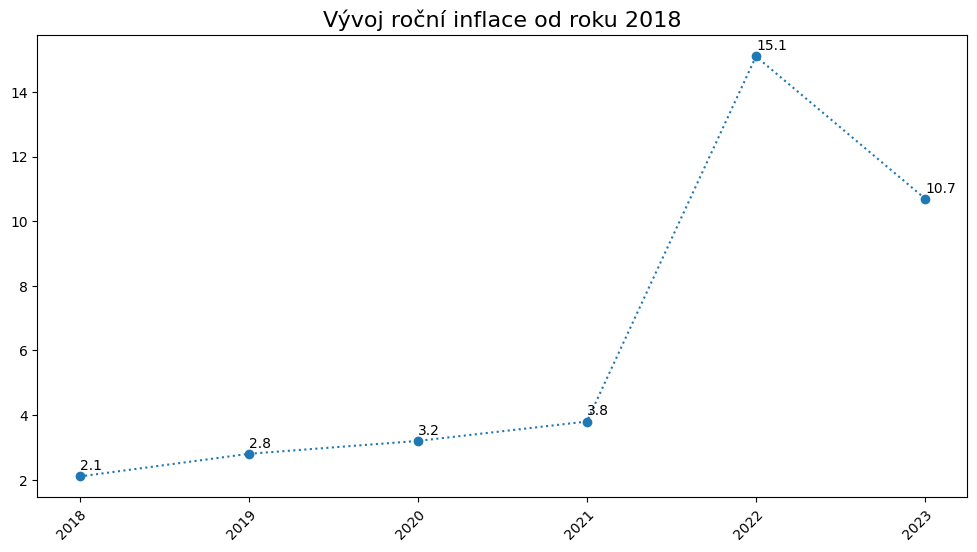

In [115]:
def add_labels(line):
    x,y=line.get_data()
    #labels=map(':'.join,zip(map(lambda s: '%g'%s,x),map(lambda s: '%g'%s,y)))
    labels=map(''.join,map(lambda s: '%g'%s,y))
    list(map(plt.text,x,y+.2,labels))

fig = plt.figure(figsize = (12,6))
line, = plt.plot(df1_rok['Úhrn'].astype(float), marker = 'o', linestyle = ':')
plt.xticks(range(len(df1_rok)), df1_rok.index, rotation = 45, ha = 'right', rotation_mode = 'anchor')
#plt.xticks(range(len(x)), labels = [f'{x:0>10,.2f}'.replace(',', ' ').replace('.', ',') for x in x.round(1)*10000], rotation = 45, ha = 'right', rotation_mode="anchor")
plt.title("Vývoj roční inflace od roku 2018", fontsize=16)
add_labels(line)
plt.show()